In [243]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder,StandardScaler
from sklearn.model_selection import train_test_split
import os
import joblib

### Initial Data Inspection

In [244]:
df=pd.read_csv('Data_Sets\SuperMarket Analysis.csv')

In [245]:
df.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Sales,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,Alex,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,1:08:00 PM,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,Giza,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29:00 AM,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,Alex,Yangon,Normal,Female,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,1:23:00 PM,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,Alex,Yangon,Member,Female,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,8:33:00 PM,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,Alex,Yangon,Member,Female,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37:00 AM,Ewallet,604.17,4.761905,30.2085,5.3


In [246]:
pd.set_option('display.max_columns', None)

In [247]:
df.duplicated().sum()

np.int64(0)

In [248]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Invoice ID               1000 non-null   object 
 1   Branch                   1000 non-null   object 
 2   City                     1000 non-null   object 
 3   Customer type            1000 non-null   object 
 4   Gender                   1000 non-null   object 
 5   Product line             1000 non-null   object 
 6   Unit price               1000 non-null   float64
 7   Quantity                 1000 non-null   int64  
 8   Tax 5%                   1000 non-null   float64
 9   Sales                    1000 non-null   float64
 10  Date                     1000 non-null   object 
 11  Time                     1000 non-null   object 
 12  Payment                  1000 non-null   object 
 13  cogs                     1000 non-null   float64
 14  gross margin percentage  

### Feature Engineering on Date/Time Columns

In [249]:
df['Date']=pd.to_datetime(df['Date'])
df['Time'] = pd.to_datetime(df['Time'], format='%I:%M:%S %p').dt.time


In [250]:
df['Date'].head()

0   2019-01-05
1   2019-03-08
2   2019-03-03
3   2019-01-27
4   2019-02-08
Name: Date, dtype: datetime64[ns]

In [251]:
df['Time'].head()

0    13:08:00
1    10:29:00
2    13:23:00
3    20:33:00
4    10:37:00
Name: Time, dtype: object

In [252]:
df.describe()

,Unit price,Quantity,Tax 5%,Sales,Date,cogs,gross margin percentage,gross income,Rating
count,1000.000000,1000.000000,1000.000000,1000.000000,1000,1000.00000,1000.000000,1000.000000,1000.00000
mean,55.672130,5.510000,15.379369,322.966749,2019-02-14 00:05:45.600000,307.58738,4.761905,15.379369,6.97270
min,10.080000,1.000000,0.508500,10.678500,2019-01-01 00:00:00,10.17000,4.761905,0.508500,4.00000
25%,32.875000,3.000000,5.924875,124.422375,2019-01-24 00:00:00,118.49750,4.761905,5.924875,5.50000
50%,55.230000,5.000000,12.088000,253.848000,2019-02-13 00:00:00,241.76000,4.761905,12.088000,7.00000
75%,77.935000,8.000000,22.445250,471.350250,2019-03-08 00:00:00,448.90500,4.761905,22.445250,8.50000
max,99.960000,10.000000,49.650000,1042.650000,2019-03-30 00:00:00,993.00000,4.761905,49.650000,10.00000
std,26.494628,2.923431,11.708825,245.885335,NaN,234.17651,0.000000,11.708825,1.71858


In [253]:
# ML Models cannot use raw date and time data directly do we convert them into numerical columns

In [254]:
df.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Sales,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,Alex,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,2019-01-05,13:08:00,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,Giza,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,2019-03-08,10:29:00,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,Alex,Yangon,Normal,Female,Home and lifestyle,46.33,7,16.2155,340.5255,2019-03-03,13:23:00,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,Alex,Yangon,Member,Female,Health and beauty,58.22,8,23.2880,489.0480,2019-01-27,20:33:00,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,Alex,Yangon,Member,Female,Sports and travel,86.31,7,30.2085,634.3785,2019-02-08,10:37:00,Ewallet,604.17,4.761905,30.2085,5.3


In [255]:
# We can also map the values if necassary

In [256]:
df['DayOfWeek'] = df['Date'].dt.dayofweek


In [257]:
df['Day'] = df['Date'].dt.day


In [258]:
df['Month'] = df['Date'].dt.month


In [259]:
#  Fot Time

In [260]:
# df['Hour'] = pd.to_datetime(df['Time'], format='%H:%M:%S').dt.hour
df['Hour'] = df['Time'].apply(lambda x: x.hour)


In [261]:
df['TimeOfDay'] = df['Hour'].apply(
    lambda h: 'Morning' if 5 <= h < 12 else
              'Afternoon' if 12 <= h < 17 else
              'Evening' if 17 <= h < 21 else
              'Night'
)


In [262]:
df.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Sales,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating,DayOfWeek,Day,Month,Hour,TimeOfDay
0,750-67-8428,Alex,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,2019-01-05,13:08:00,Ewallet,522.83,4.761905,26.1415,9.1,5,5,1,13,Afternoon
1,226-31-3081,Giza,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,2019-03-08,10:29:00,Cash,76.40,4.761905,3.8200,9.6,4,8,3,10,Morning
2,631-41-3108,Alex,Yangon,Normal,Female,Home and lifestyle,46.33,7,16.2155,340.5255,2019-03-03,13:23:00,Credit card,324.31,4.761905,16.2155,7.4,6,3,3,13,Afternoon
3,123-19-1176,Alex,Yangon,Member,Female,Health and beauty,58.22,8,23.2880,489.0480,2019-01-27,20:33:00,Ewallet,465.76,4.761905,23.2880,8.4,6,27,1,20,Evening
4,373-73-7910,Alex,Yangon,Member,Female,Sports and travel,86.31,7,30.2085,634.3785,2019-02-08,10:37:00,Ewallet,604.17,4.761905,30.2085,5.3,4,8,2,10,Morning


In [263]:
df.drop(columns=['Date','Time'],inplace=True)

In [264]:
df.drop(columns=['Invoice ID'],inplace=True)

## EDA

##### Univariate Analysis

In [265]:
num_cols=df.select_dtypes(include=['number','int','float'])
cat_cols=df.select_dtypes(exclude=['number','int','float'])

In [266]:
num_cols.columns

Index(['Unit price', 'Quantity', 'Tax 5%', 'Sales', 'cogs',
       'gross margin percentage', 'gross income', 'Rating', 'DayOfWeek', 'Day',
       'Month', 'Hour'],
      dtype='object')

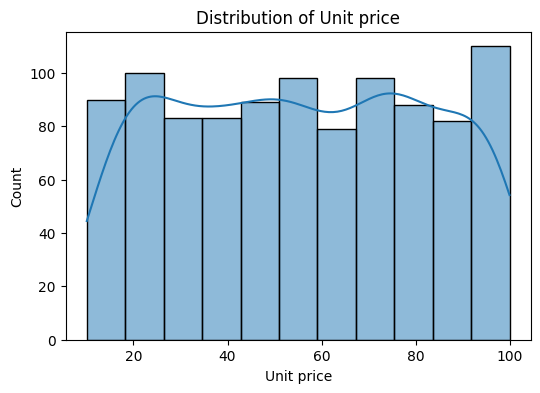

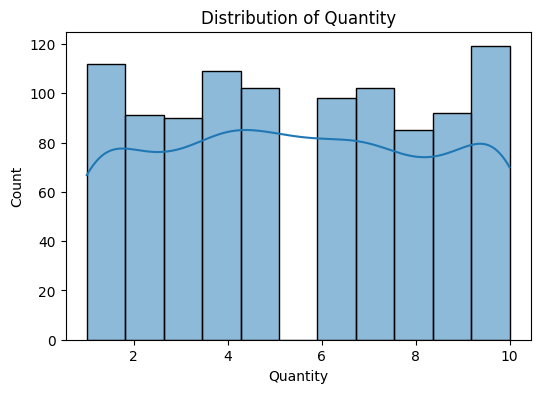

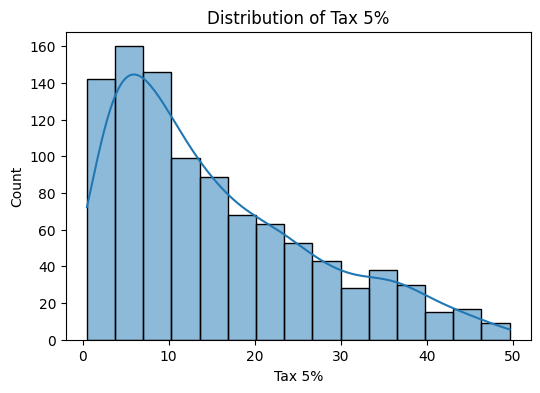

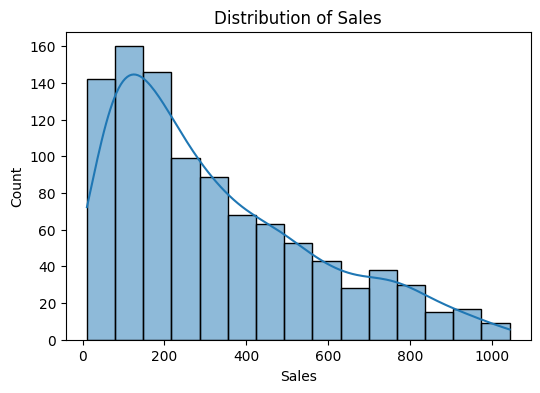

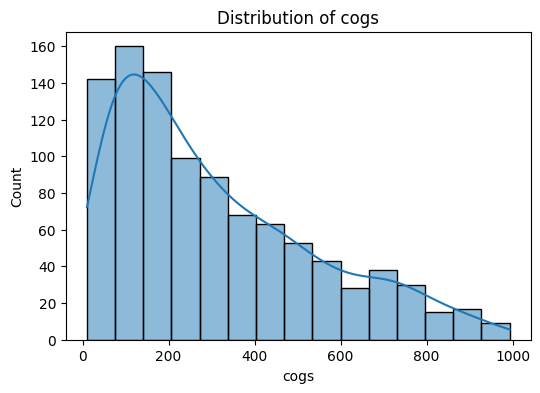

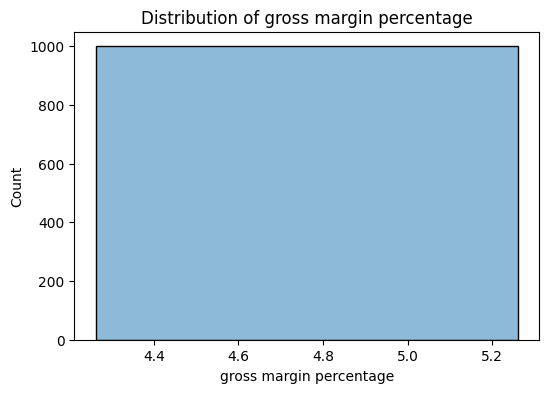

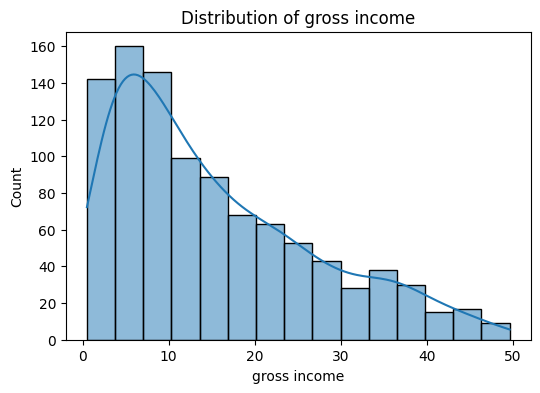

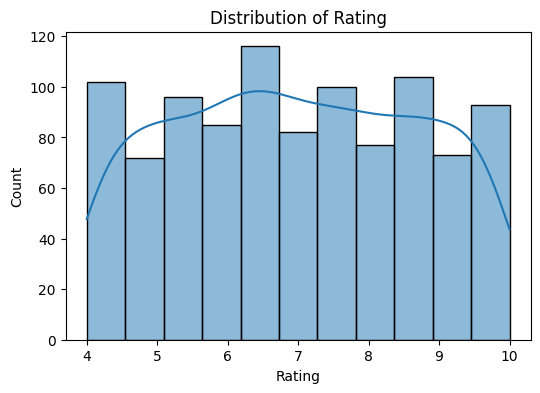

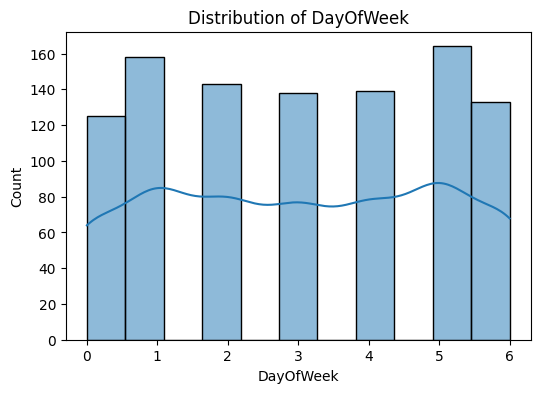

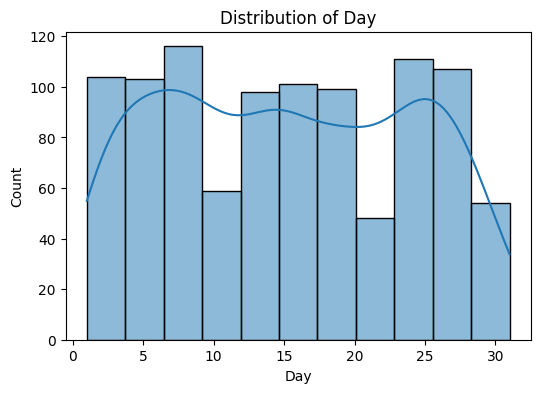

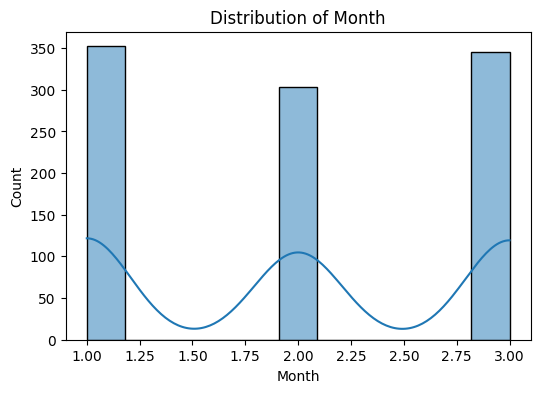

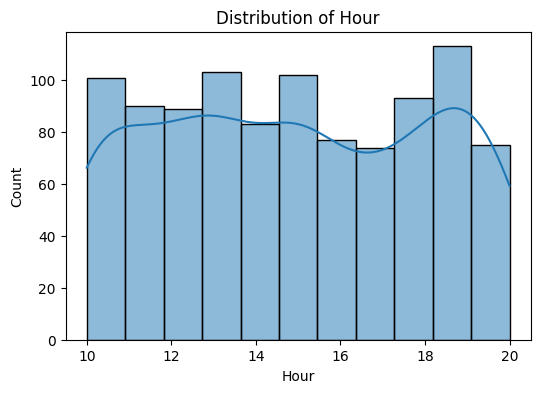

In [267]:
for col in num_cols:
    plt.figure(figsize=(6,4))
    sns.histplot(df[col], kde=True)
    plt.title(f'Distribution of {col}')
    plt.show()

In [268]:
from scipy.stats import skew
print("Skewness:", skew(num_cols['Sales']))

Skewness: 0.8912303920037631


Skewness of Sales: 0.8912303920037631


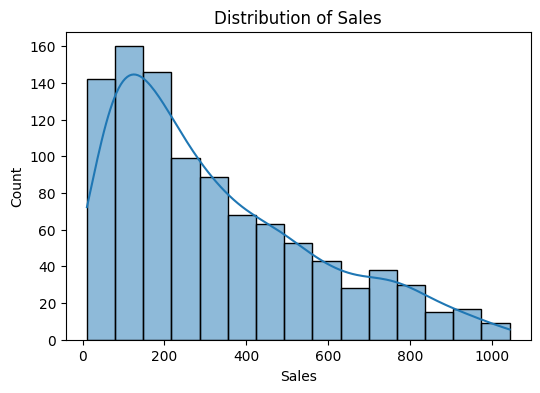

In [269]:
##skewness of the target column,same as above code
from scipy.stats import skew

sales_skew = skew(df['Sales'])
print("Skewness of Sales:", sales_skew)


# checking distribution of target column 'Sales' shows the skewness visually which is right skewed
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(6,4))
sns.histplot(df['Sales'], kde=True)
plt.title("Distribution of Sales")
plt.show()

Lower bound: -395.9694375
Upper bound: 991.7420625
Number of outliers: 9
Percentage of outliers: 0.8999999999999999


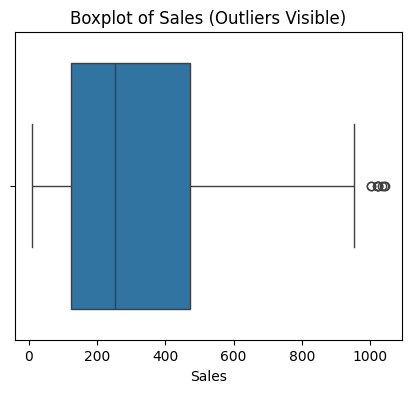

In [270]:
# Calculate IQR for Sales outliers detection
Q1 = df['Sales'].quantile(0.25)
Q3 = df['Sales'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

print("Lower bound:", lower_bound)
print("Upper bound:", upper_bound)


# identifying the outlier 
outliers = df[(df['Sales'] < lower_bound) | (df['Sales'] > upper_bound)]

print("Number of outliers:", len(outliers))
print("Percentage of outliers:", (len(outliers) / len(df)) * 100)
#visualizing the outliers
plt.figure(figsize=(5,4))
sns.boxplot(x=df['Sales'])
plt.title("Boxplot of Sales (Outliers Visible)")
plt.show()



In [271]:
num_cols=df.select_dtypes(include=['int','float','number'])

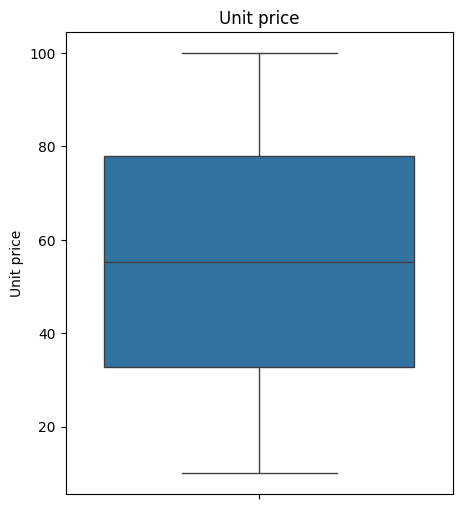

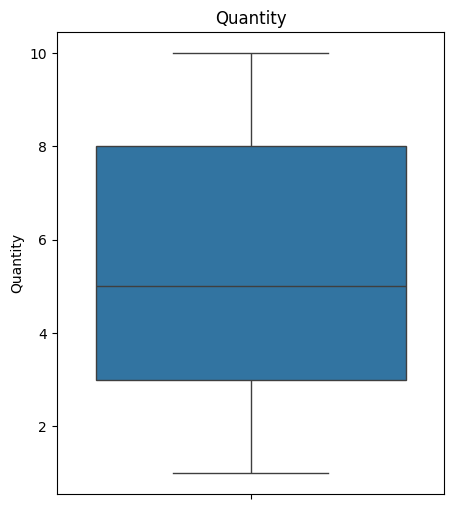

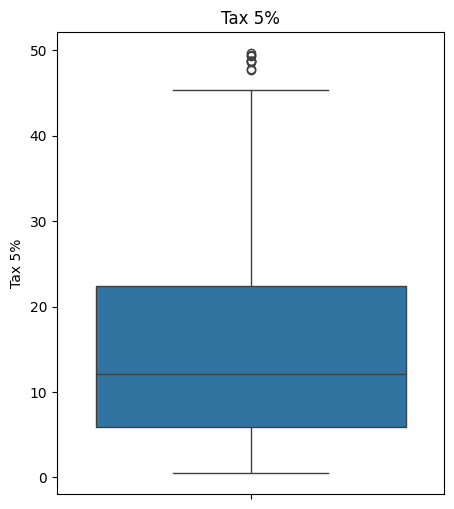

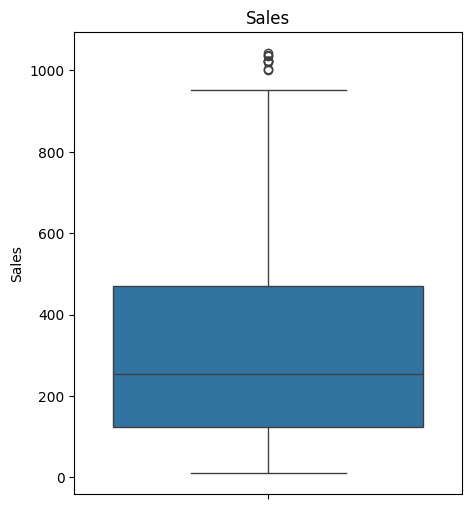

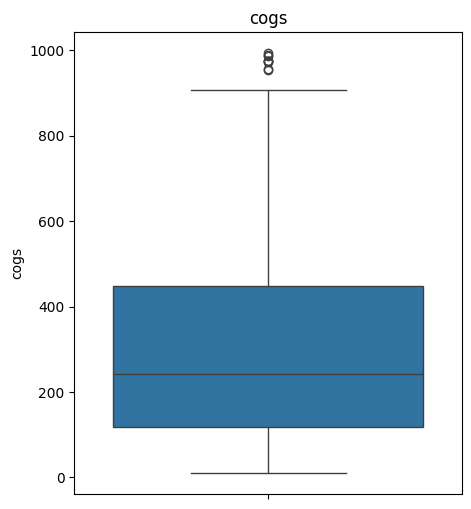

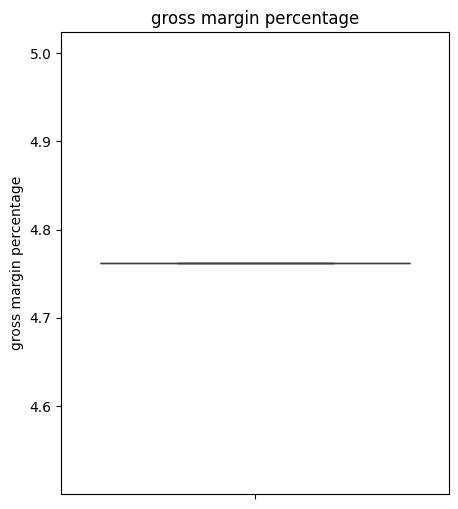

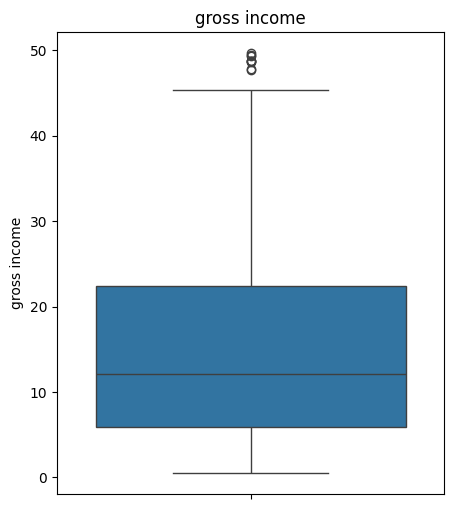

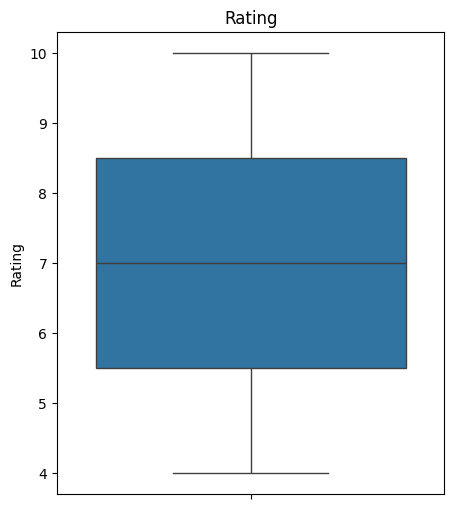

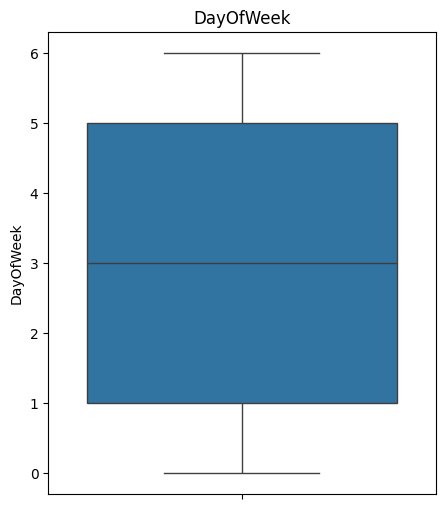

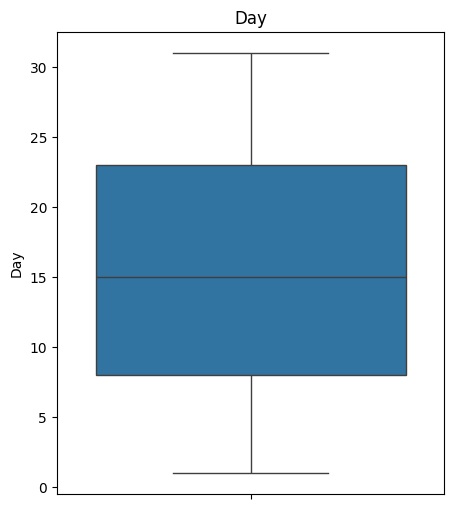

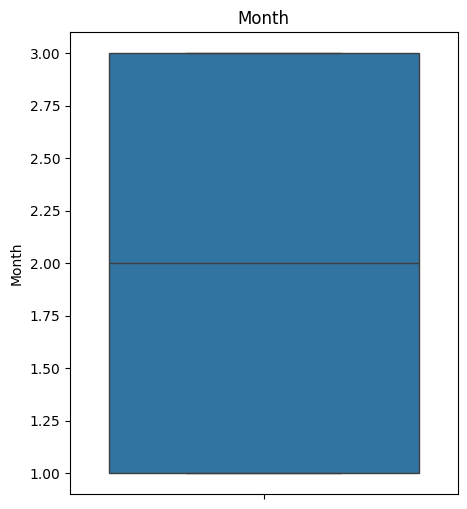

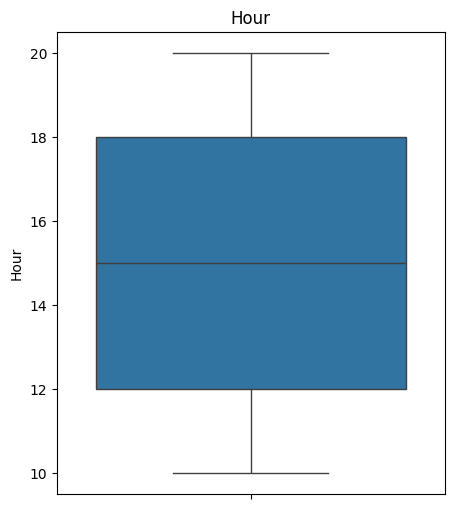

In [272]:
for col in num_cols:
    plt.figure(figsize=(5,6))
    sns.boxplot(num_cols[col])
    plt.title(col)
    plt.show()

In [273]:
# To deal with outlier we use Winsorization

# Winsorization is a statistical technique used to limit the influence of extreme values (outliers)
#  by capping them at specific percentile thresholds — rather than removing them.
# It brings extreme values closer to the bulk of the data, instead of deleting them.


In [274]:
#Skip for now
# from scipy.stats.mstats import winsorize
# train_cleaned['Sales_transformed_capped']=winsorize(train_cleaned['Sales_transformed'],limits=[0.01,0.01])


In [275]:
cat_cols.head()

,Branch,City,Customer type,Gender,Product line,Payment,TimeOfDay
0,Alex,Yangon,Member,Female,Health and beauty,Ewallet,Afternoon
1,Giza,Naypyitaw,Normal,Female,Electronic accessories,Cash,Morning
2,Alex,Yangon,Normal,Female,Home and lifestyle,Credit card,Afternoon
3,Alex,Yangon,Member,Female,Health and beauty,Ewallet,Evening
4,Alex,Yangon,Member,Female,Sports and travel,Ewallet,Morning


In [276]:
for col in cat_cols:
    vc = df[col].value_counts() # counts how many times each unique category appears in that column.
    pct = df[col].value_counts(normalize=True).mul(100)#finds what percentage of total data each represents.
    summary = pd.concat([vc, pct], axis=1)# axis=1 means to concatenate horizontally
    summary.columns = ['count','percent']
    print(f"\n=== {col} ===")
    print(summary)



=== Branch ===
        count  percent
Branch                
Alex      340     34.0
Cairo     332     33.2
Giza      328     32.8

=== City ===
           count  percent
City                     
Yangon       340     34.0
Mandalay     332     33.2
Naypyitaw    328     32.8

=== Customer type ===
               count  percent
Customer type                
Member           565     56.5
Normal           435     43.5

=== Gender ===
        count  percent
Gender                
Female    571     57.1
Male      429     42.9

=== Product line ===
                        count  percent
Product line                          
Fashion accessories       178     17.8
Food and beverages        174     17.4
Electronic accessories    170     17.0
Sports and travel         166     16.6
Home and lifestyle        160     16.0
Health and beauty         152     15.2

=== Payment ===
             count  percent
Payment                    
Ewallet        345     34.5
Cash           344     34.4
Credit card

In [277]:
cat_cols.head()

,Branch,City,Customer type,Gender,Product line,Payment,TimeOfDay
0,Alex,Yangon,Member,Female,Health and beauty,Ewallet,Afternoon
1,Giza,Naypyitaw,Normal,Female,Electronic accessories,Cash,Morning
2,Alex,Yangon,Normal,Female,Home and lifestyle,Credit card,Afternoon
3,Alex,Yangon,Member,Female,Health and beauty,Ewallet,Evening
4,Alex,Yangon,Member,Female,Sports and travel,Ewallet,Morning


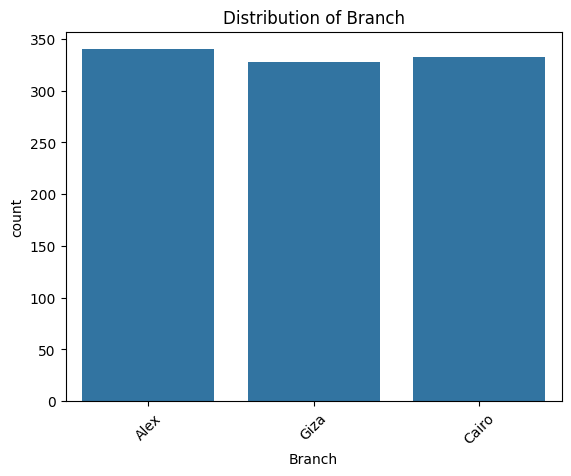

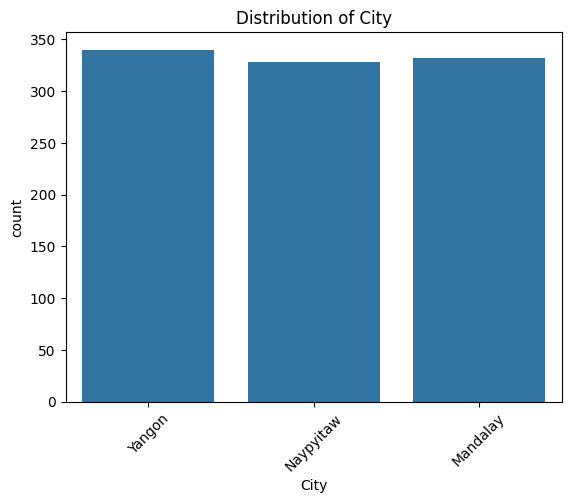

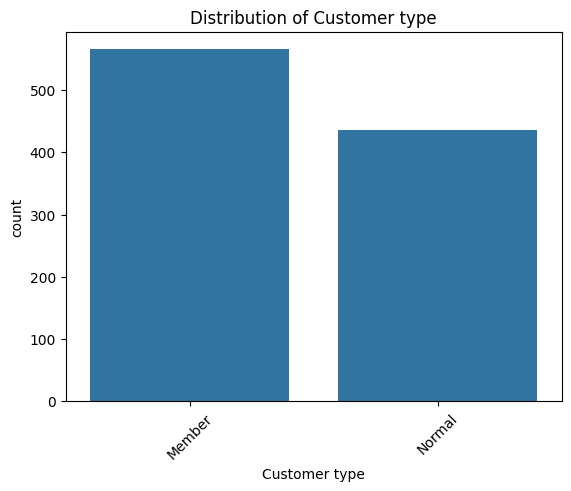

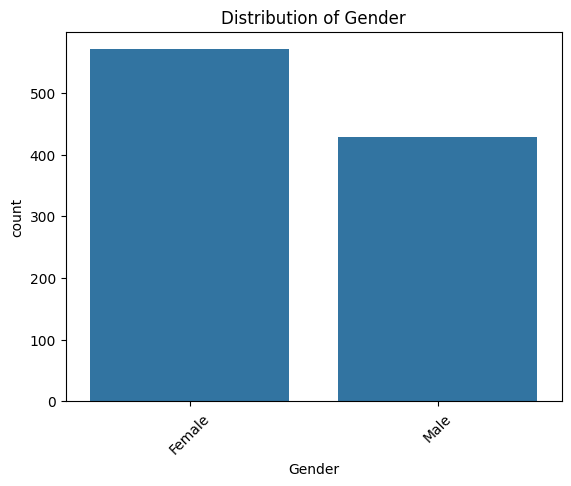

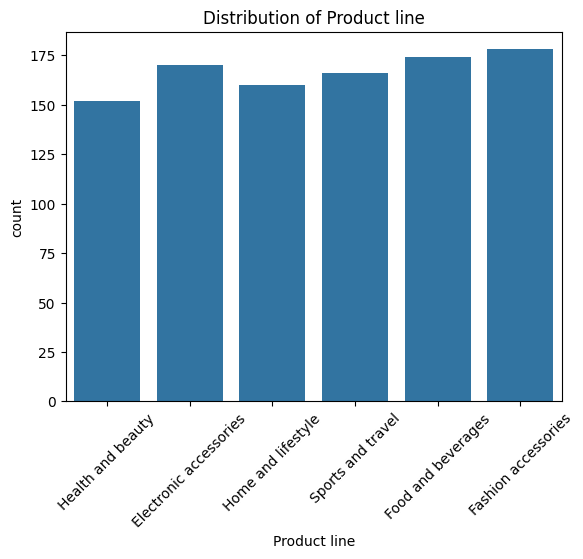

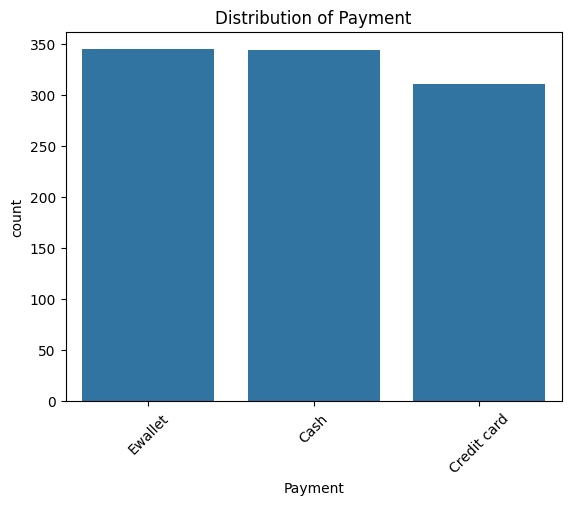

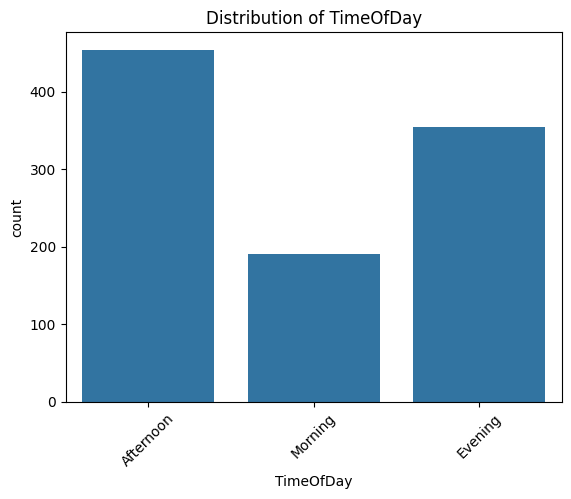

In [278]:

for col in cat_cols:
    sns.countplot(data=df,x=col)
    plt.title(f'Distribution of {col}')
    plt.xticks(rotation=45)
    plt.show()

-Bivariate Data

In [279]:
num_cols.head()

,Unit price,Quantity,Tax 5%,Sales,cogs,gross margin percentage,gross income,Rating,DayOfWeek,Day,Month,Hour
0,74.69,7,26.1415,548.9715,522.83,4.761905,26.1415,9.1,5,5,1,13
1,15.28,5,3.8200,80.2200,76.40,4.761905,3.8200,9.6,4,8,3,10
2,46.33,7,16.2155,340.5255,324.31,4.761905,16.2155,7.4,6,3,3,13
3,58.22,8,23.2880,489.0480,465.76,4.761905,23.2880,8.4,6,27,1,20
4,86.31,7,30.2085,634.3785,604.17,4.761905,30.2085,5.3,4,8,2,10


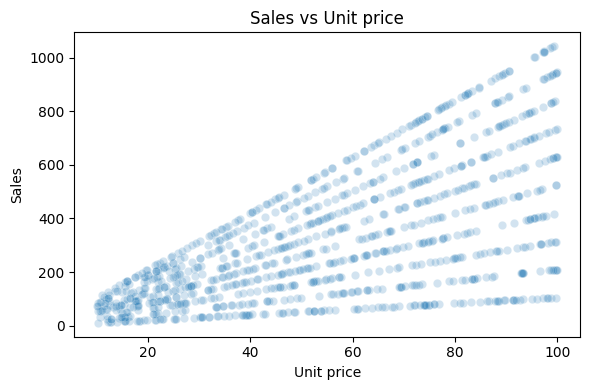

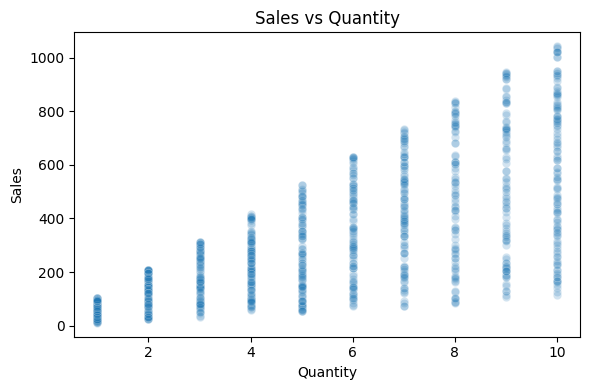

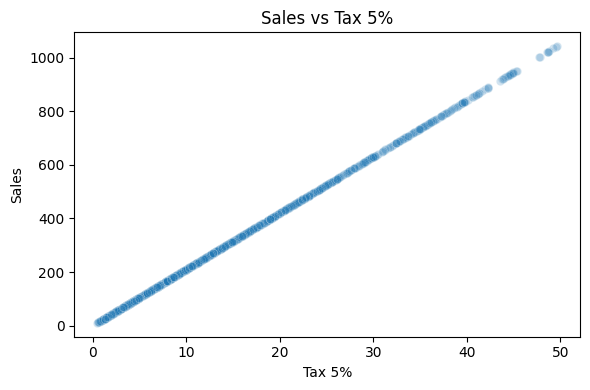

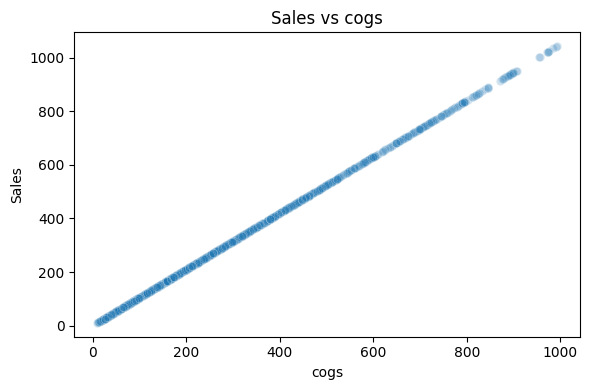

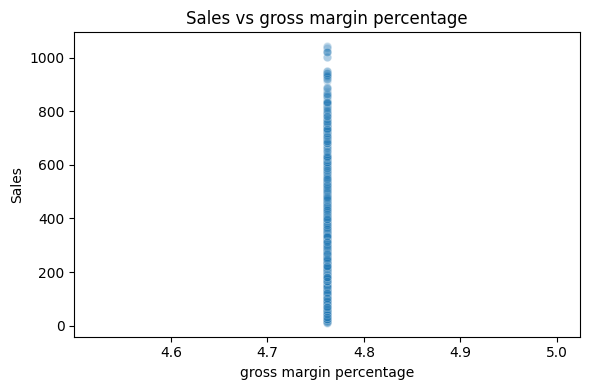

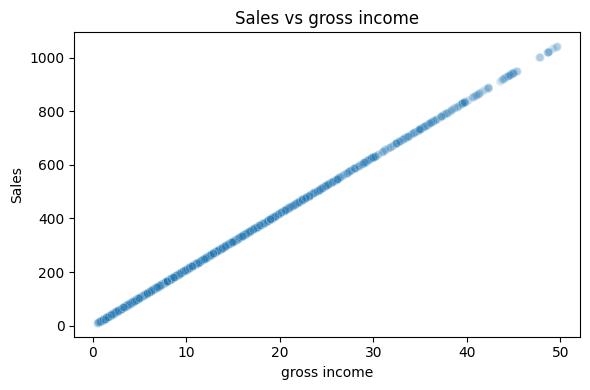

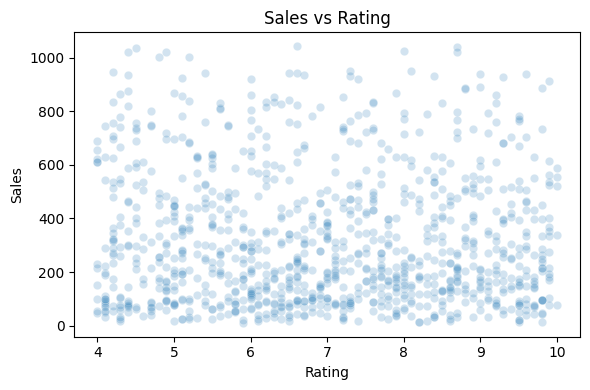

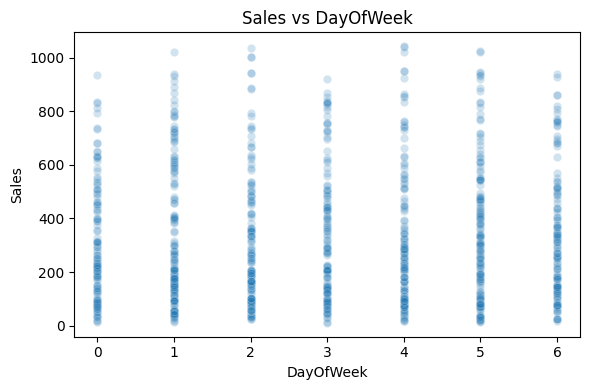

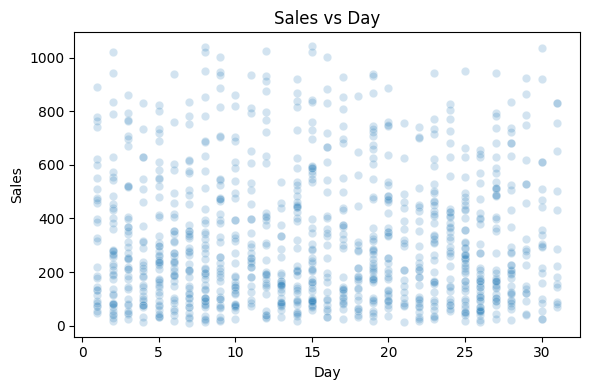

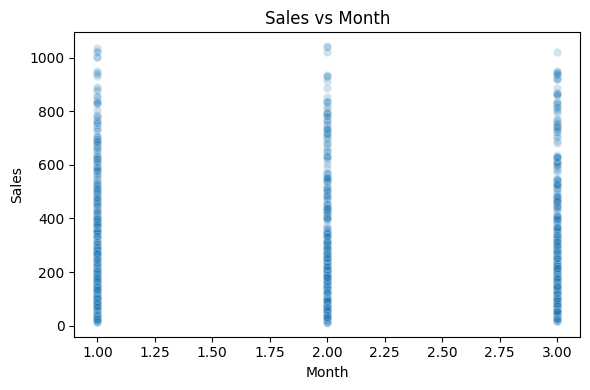

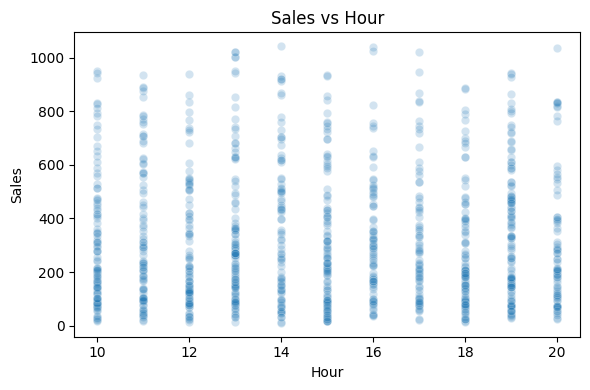


Correlation with Sales:

Sales                      1.000000
gross income               1.000000
Tax 5%                     1.000000
cogs                       1.000000
Quantity                   0.705510
Unit price                 0.633962
DayOfWeek                  0.038809
Day                       -0.002515
Hour                      -0.002770
Month                     -0.022301
Rating                    -0.036442
gross margin percentage         NaN
Name: Sales, dtype: float64


In [280]:

# ================================
# Numerical vs Sales
# ================================
num_cols = df.select_dtypes(include=['number', 'float', 'int']).columns

for col in num_cols:
    if col != 'Sales':     # skip Sales vs Sales
        plt.figure(figsize=(6,4))
        sns.scatterplot(x=df[col], y=df['Sales'],alpha=0.2)
        plt.title(f"Sales vs {col}")
        plt.tight_layout()
        plt.show()

# Correlation of Sales with other numeric columns
corr_with_sales = df[num_cols].corr()['Sales'].sort_values(ascending=False)
print("\nCorrelation with Sales:\n")
print(corr_with_sales)




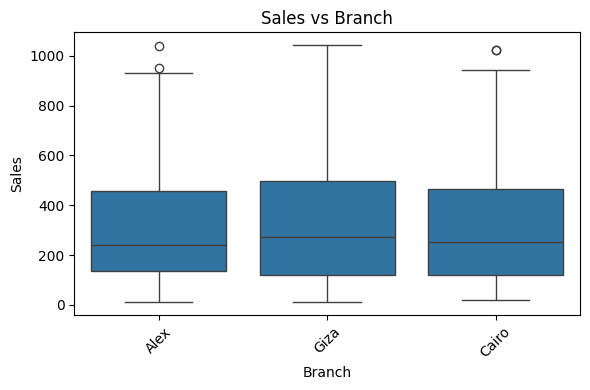

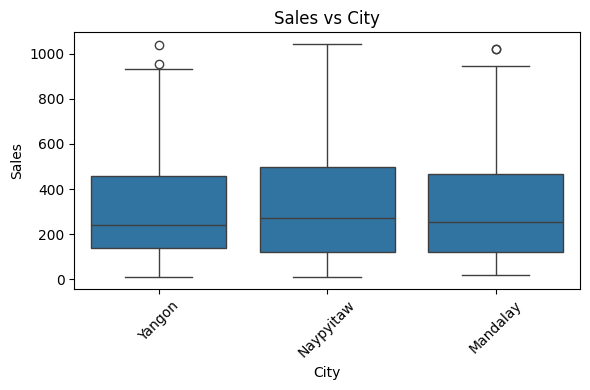

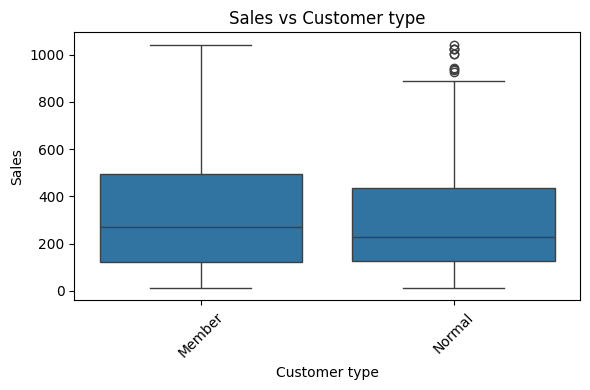

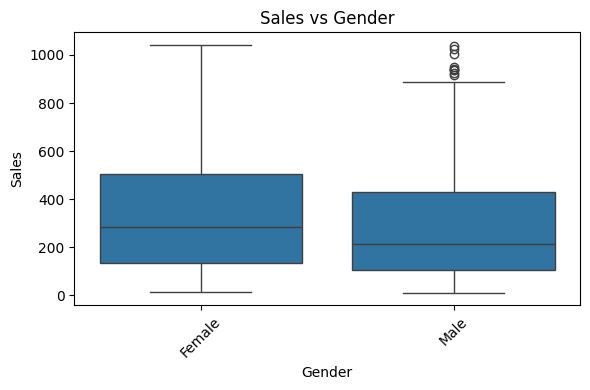

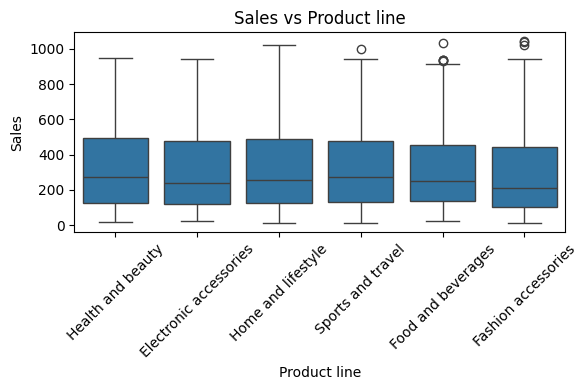

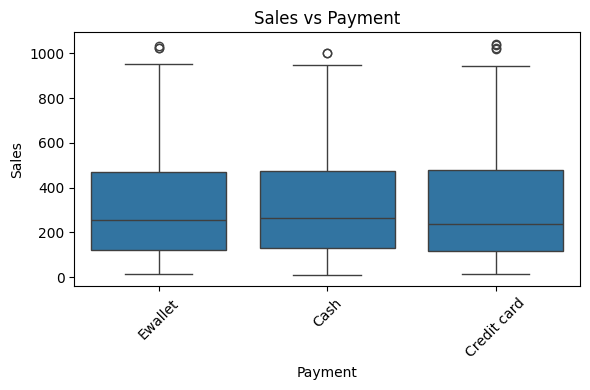

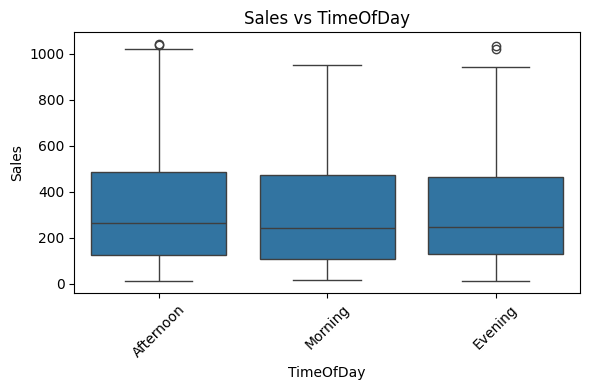

In [281]:
# ================================
# Categorical vs Sales
# ================================
cat_cols = df.select_dtypes(exclude=['number', 'float', 'int']).columns

for col in cat_cols:
    plt.figure(figsize=(6,4))
    sns.boxplot(x=df[col], y=df['Sales'])
    plt.title(f"Sales vs {col}")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()


In [282]:
num_cols

Index(['Unit price', 'Quantity', 'Tax 5%', 'Sales', 'cogs',
       'gross margin percentage', 'gross income', 'Rating', 'DayOfWeek', 'Day',
       'Month', 'Hour'],
      dtype='object')

In [283]:
num_cols=df.select_dtypes(include=['int','float','number'])
cat_cols=df.select_dtypes(exclude=['number','int','float'])

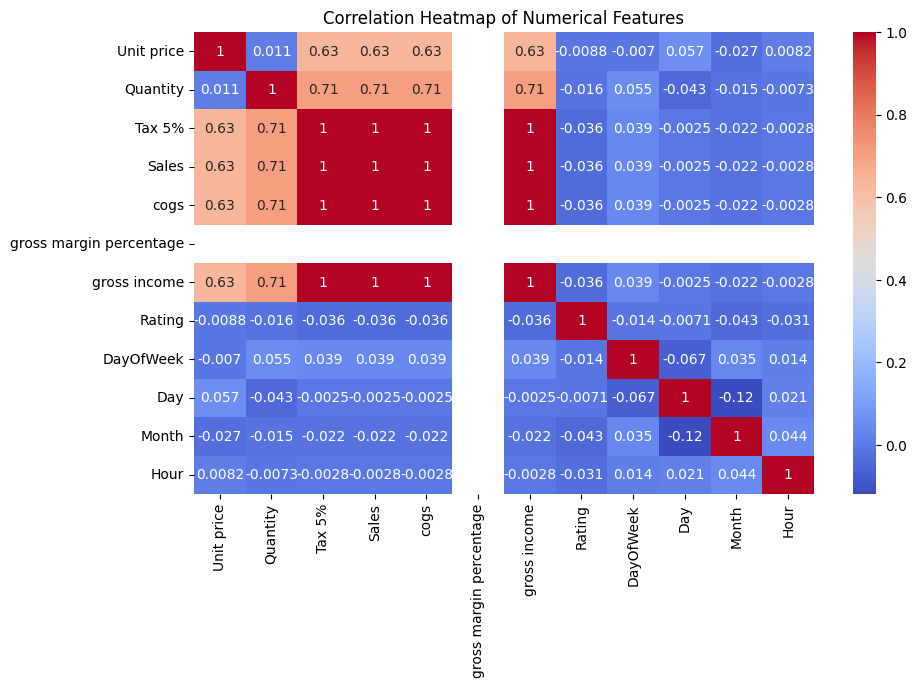

In [284]:

plt.figure(figsize=(10,6))
sns.heatmap(num_cols.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap of Numerical Features")
plt.show()

### Feature Engineering

In [285]:
df.head()

,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Sales,Payment,cogs,gross margin percentage,gross income,Rating,DayOfWeek,Day,Month,Hour,TimeOfDay
0,Alex,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,Ewallet,522.83,4.761905,26.1415,9.1,5,5,1,13,Afternoon
1,Giza,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,Cash,76.40,4.761905,3.8200,9.6,4,8,3,10,Morning
2,Alex,Yangon,Normal,Female,Home and lifestyle,46.33,7,16.2155,340.5255,Credit card,324.31,4.761905,16.2155,7.4,6,3,3,13,Afternoon
3,Alex,Yangon,Member,Female,Health and beauty,58.22,8,23.2880,489.0480,Ewallet,465.76,4.761905,23.2880,8.4,6,27,1,20,Evening
4,Alex,Yangon,Member,Female,Sports and travel,86.31,7,30.2085,634.3785,Ewallet,604.17,4.761905,30.2085,5.3,4,8,2,10,Morning


In [286]:
df.columns

Index(['Branch', 'City', 'Customer type', 'Gender', 'Product line',
       'Unit price', 'Quantity', 'Tax 5%', 'Sales', 'Payment', 'cogs',
       'gross margin percentage', 'gross income', 'Rating', 'DayOfWeek', 'Day',
       'Month', 'Hour', 'TimeOfDay'],
      dtype='object')

In [287]:
#Feature Engineering
# Creating Interaction Features
#--------------------------------------------
# Productline X TimeOfDay
df['ProductLine_TimeOfDay'] = (
    df['Product line'].astype(str) + '_' + df['TimeOfDay'].astype(str) 
)

#Gender X Product Line
df['ProductLine_Gender'] = (
    df['Product line'].astype(str) + '_' + df['Gender'].astype(str) 
)

#Branch X TimeOFDay

df['Branch_TimeOfDay'] = (
    df['Branch'].astype(str) + '_' + df['TimeOfDay'].astype(str) 
)






In [288]:
df.head()

,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Sales,Payment,cogs,gross margin percentage,gross income,Rating,DayOfWeek,Day,Month,Hour,TimeOfDay,ProductLine_TimeOfDay,ProductLine_Gender,Branch_TimeOfDay
0,Alex,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,Ewallet,522.83,4.761905,26.1415,9.1,5,5,1,13,Afternoon,Health and beauty_Afternoon,Health and beauty_Female,Alex_Afternoon
1,Giza,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,Cash,76.40,4.761905,3.8200,9.6,4,8,3,10,Morning,Electronic accessories_Morning,Electronic accessories_Female,Giza_Morning
2,Alex,Yangon,Normal,Female,Home and lifestyle,46.33,7,16.2155,340.5255,Credit card,324.31,4.761905,16.2155,7.4,6,3,3,13,Afternoon,Home and lifestyle_Afternoon,Home and lifestyle_Female,Alex_Afternoon
3,Alex,Yangon,Member,Female,Health and beauty,58.22,8,23.2880,489.0480,Ewallet,465.76,4.761905,23.2880,8.4,6,27,1,20,Evening,Health and beauty_Evening,Health and beauty_Female,Alex_Evening
4,Alex,Yangon,Member,Female,Sports and travel,86.31,7,30.2085,634.3785,Ewallet,604.17,4.761905,30.2085,5.3,4,8,2,10,Morning,Sports and travel_Morning,Sports and travel_Female,Alex_Morning


### Encoding


In [289]:
num_cols.head()

,Unit price,Quantity,Tax 5%,Sales,cogs,gross margin percentage,gross income,Rating,DayOfWeek,Day,Month,Hour
0,74.69,7,26.1415,548.9715,522.83,4.761905,26.1415,9.1,5,5,1,13
1,15.28,5,3.8200,80.2200,76.40,4.761905,3.8200,9.6,4,8,3,10
2,46.33,7,16.2155,340.5255,324.31,4.761905,16.2155,7.4,6,3,3,13
3,58.22,8,23.2880,489.0480,465.76,4.761905,23.2880,8.4,6,27,1,20
4,86.31,7,30.2085,634.3785,604.17,4.761905,30.2085,5.3,4,8,2,10


In [290]:
num_cols=df.select_dtypes(include=['int','float','number'])
cat_cols=df.select_dtypes(exclude=['int','float','number'])


In [291]:
# Encoding numerical columns with standard scalar

num_cols = num_cols.columns.tolist()
scaler = StandardScaler()
df_scaled = df.copy()  # keep original dataset
df_scaled[num_cols] = scaler.fit_transform(df[num_cols])

In [292]:
cat_cols.head()

,Branch,City,Customer type,Gender,Product line,Payment,TimeOfDay,ProductLine_TimeOfDay,ProductLine_Gender,Branch_TimeOfDay
0,Alex,Yangon,Member,Female,Health and beauty,Ewallet,Afternoon,Health and beauty_Afternoon,Health and beauty_Female,Alex_Afternoon
1,Giza,Naypyitaw,Normal,Female,Electronic accessories,Cash,Morning,Electronic accessories_Morning,Electronic accessories_Female,Giza_Morning
2,Alex,Yangon,Normal,Female,Home and lifestyle,Credit card,Afternoon,Home and lifestyle_Afternoon,Home and lifestyle_Female,Alex_Afternoon
3,Alex,Yangon,Member,Female,Health and beauty,Ewallet,Evening,Health and beauty_Evening,Health and beauty_Female,Alex_Evening
4,Alex,Yangon,Member,Female,Sports and travel,Ewallet,Morning,Sports and travel_Morning,Sports and travel_Female,Alex_Morning


In [293]:
# Encoding categorical columns with One Hot Encoding
#Note Customer Type might need to be encoded in another way
cat_cols = cat_cols.columns.tolist()
df_encoded = pd.get_dummies(df, columns=cat_cols, drop_first=False)


In [294]:
# df_encoded.drop(columns=["Invoice ID"],inplace=True)

In [295]:
df_encoded.head()

,Unit price,Quantity,Tax 5%,Sales,cogs,gross margin percentage,gross income,Rating,DayOfWeek,Day,Month,Hour,Branch_Alex,Branch_Cairo,Branch_Giza,City_Mandalay,City_Naypyitaw,City_Yangon,Customer type_Member,Customer type_Normal,Gender_Female,Gender_Male,Product line_Electronic accessories,Product line_Fashion accessories,Product line_Food and beverages,Product line_Health and beauty,Product line_Home and lifestyle,Product line_Sports and travel,Payment_Cash,Payment_Credit card,Payment_Ewallet,TimeOfDay_Afternoon,TimeOfDay_Evening,TimeOfDay_Morning,ProductLine_TimeOfDay_Electronic accessories_Afternoon,ProductLine_TimeOfDay_Electronic accessories_Evening,ProductLine_TimeOfDay_Electronic accessories_Morning,ProductLine_TimeOfDay_Fashion accessories_Afternoon,ProductLine_TimeOfDay_Fashion accessories_Evening,ProductLine_TimeOfDay_Fashion accessories_Morning,ProductLine_TimeOfDay_Food and beverages_Afternoon,ProductLine_TimeOfDay_Food and beverages_Evening,ProductLine_TimeOfDay_Food and beverages_Morning,ProductLine_TimeOfDay_Health and beauty_Afternoon,ProductLine_TimeOfDay_Health and beauty_Evening,ProductLine_TimeOfDay_Health and beauty_Morning,ProductLine_TimeOfDay_Home and lifestyle_Afternoon,ProductLine_TimeOfDay_Home and lifestyle_Evening,ProductLine_TimeOfDay_Home and lifestyle_Morning,ProductLine_TimeOfDay_Sports and travel_Afternoon,ProductLine_TimeOfDay_Sports and travel_Evening,ProductLine_TimeOfDay_Sports and travel_Morning,ProductLine_Gender_Electronic accessories_Female,ProductLine_Gender_Electronic accessories_Male,ProductLine_Gender_Fashion accessories_Female,ProductLine_Gender_Fashion accessories_Male,ProductLine_Gender_Food and beverages_Female,ProductLine_Gender_Food and beverages_Male,ProductLine_Gender_Health and beauty_Female,ProductLine_Gender_Health and beauty_Male,ProductLine_Gender_Home and lifestyle_Female,ProductLine_Gender_Home and lifestyle_Male,ProductLine_Gender_Sports and travel_Female,ProductLine_Gender_Sports and travel_Male,Branch_TimeOfDay_Alex_Afternoon,Branch_TimeOfDay_Alex_Evening,Branch_TimeOfDay_Alex_Morning,Branch_TimeOfDay_Cairo_Afternoon,Branch_TimeOfDay_Cairo_Evening,Branch_TimeOfDay_Cairo_Morning,Branch_TimeOfDay_Giza_Afternoon,Branch_TimeOfDay_Giza_Evening,Branch_TimeOfDay_Giza_Morning
0,74.69,7,26.1415,548.9715,522.83,4.761905,26.1415,9.1,5,5,1,13,True,False,False,False,False,True,True,False,True,False,False,False,False,True,False,False,False,False,True,True,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,True,False,False,False,False,False,False,False,False
1,15.28,5,3.8200,80.2200,76.40,4.761905,3.8200,9.6,4,8,3,10,False,False,True,False,True,False,False,True,True,False,True,False,False,False,False,False,True,False,False,False,False,True,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True
2,46.33,7,16.2155,340.5255,324.31,4.761905,16.2155,7.4,6,3,3,13,True,False,False,False,False,True,False,True,True,False,False,False,False,False,True,False,False,True,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,True,False,False,False,False,False,False,False,False
3,58.22,8,23.2880,489.0480,465.76,4.761905,23.2880,8.4,6,27,1,20,True,False,False,False,False,True,True,False,True,False,False,False,False,True,False,False,False,False,True,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,True,False,False,False,False,False,False,False
4,86.31,7,30.2085,634.3785,604.17,4.761905,30.2085,5.

In [296]:
# These  columns might be causing data leakage['Tax 5%', 'cogs', 'gross margin percentage', 'gross income']
df_encoded.drop(columns=['Tax 5%', 'cogs', 'gross margin percentage', 'gross income'],inplace=True)


### Initial Model Training

In [297]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.model_selection import cross_val_score


X = df_encoded.drop(columns=["Sales"])  # features
y = df_encoded["Sales"]                 # target


X_train, X_test, y_train, y_test = train_test_split(
    X, y, 
    test_size=0.2,     # 20% test, 80% train
    random_state=42,   # reproducible
)


models =  {
    "Linear Regression": LinearRegression(),
    "Ridge Regression": Ridge(alpha=1.0),
    "Lasso Regression": Lasso(alpha=0.1),
    "Random Forest": RandomForestRegressor(n_estimators=100, random_state=42),
    "Gradient Boosting": GradientBoostingRegressor(n_estimators=100, random_state=42)
    
}


for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    print(f"=== {name} ===")
    print("R² Score:", r2_score(y_test, y_pred))
    print("Mean Squared Error:", mean_squared_error(y_test, y_pred))
    print("Mean Absolute Error:", mean_absolute_error(y_test, y_pred))
    # Cross-validation is used to measure the average performance of the model
    # by training and validating it on multiple splits of the dataset,
    # giving a more reliable estimate than a single test split
    cv_scores=(cross_val_score(model, X, y, cv=5, scoring="r2"))

    print("CV R² (mean):",(cv_scores).mean())

    print("\n")



=== Linear Regression ===
R² Score: 0.8975342953087355
Mean Squared Error: 6666.3169310761195
Mean Absolute Error: 61.97003187978964
CV R² (mean): 0.8815930849190643


=== Ridge Regression ===
R² Score: 0.8977378722624376
Mean Squared Error: 6653.0724167546605
Mean Absolute Error: 61.8630224008772
CV R² (mean): 0.8817245549553843


=== Lasso Regression ===
R² Score: 0.8987103434108021
Mean Squared Error: 6589.804410148372
Mean Absolute Error: 61.3051132440625
CV R² (mean): 0.8823058199481186


=== Random Forest ===
R² Score: 0.9975027430251254
Mean Squared Error: 162.46905735937924
Mean Absolute Error: 8.52117157499998
CV R² (mean): 0.9977537971258903


=== Gradient Boosting ===
R² Score: 0.9982428037564525
Mean Squared Error: 114.32144154845922
Mean Absolute Error: 7.907326759171838
CV R² (mean): 0.9979495887904168




In [298]:
# Using Shuffle Test to check if the accuracy is True or is being increased due to leakage

from sklearn.utils import shuffle

y_shuffled = shuffle(y, random_state=42)

rf = RandomForestRegressor(n_estimators=100, random_state=42)

shuffle_scores = cross_val_score(
    rf, X, y_shuffled,
    cv=5,
    scoring="r2"
)

print("Shuffled R²:", shuffle_scores.mean())




Shuffled R²: -0.0661727657213913


In [299]:
# Shuffeled R Squares mean is -0.0661 whis means there is no data leakage

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
import joblib
import os



# Build preprocessing transformer
preprocessor = ColumnTransformer(
    transformers=[
        ("cat", OneHotEncoder(handle_unknown="ignore"), cat_cols),
        ("num", StandardScaler(), num_cols)
    ]
)

# Wrap trained model in a pipeline
final_pipeline = Pipeline([
    ("preprocessing", preprocessor),
    ("model", rf)   # Trained Random Forest
])

# Save pipeline for website
os.makedirs("ML_Model", exist_ok=True)
joblib.dump(final_pipeline, "ML_Model/random_forest_pipeline.pkl")


['ML_Model/random_forest_pipeline.pkl']